In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#UPLOADIND OUR DATASET
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Read the Excel file directly into a pandas DataFrame
data_mental_health = pd.read_excel("/content/Data monitoring program.xlsx")

# Drop columns with any null values
data_mental_health.dropna(axis=1, inplace=True)

In [ ]:
data_mental_health.head()


,1. County,2. Department,4. Activity Area / League Field,5. Activity Date,6. Activity Name /Football Coaching Session,6. Activity Name /Football League,6. Activity Name /Peer Education Session,6. Activity Name /Mental Health Session,6. Activity Name /Field Leaders Meeting,6. Activity Name /Capacity Building,6. Activity Name /Safe Guarding Session,6. Activity Name /Others,6. Activity Name /Tumanyane Session,6. Activity Name /Climate Action Session,6. Activity Name /Young Men as Equal Partners (YMEP),8. Total Number of Participants Reached,8a. Number of Participants aged 7 - 10 Years,_id
0,Kilifi,Health,Mwenzamoyo,2025-08-23 00:00:00,0,0,1,0,0,0,0,0,0,0,0,65,18,561438482
1,Mombasa,Community Engagement and Football,R/mwewe,2025-08-12 00:00:00,1,0,0,0,0,0,0,0,0,0,0,40,5,561461660
2,Tana River,community engagement and football,Reuben mwewe,2025-08-05 00:00:00,1,0,0,0,0,0,0,0,0,0,0,40,8,561464521
3,Tana River,community engagement and football,Reuben mwewe,2025-08-08 00:00:00,1,0,0,0,0,0,0,0,0,0,0,36,3,561466607
4,Kilifi,health,mwezamoyo,2025-07-19 00:00:00,0,0,1,0,0,0,0,0,0,0,0,40,7,561467145


In [ ]:
#Checking for the missing values
data_mental_health.isnull().sum()

,0
1. County,0
2. Department,0
4. Activity Area / League Field,0
5. Activity Date,0
6. Activity Name /Football Coaching Session,0
6. Activity Name /Football League,0
6. Activity Name /Peer Education Session,0
6. Activity Name /Mental Health Session,0
6. Activity Name /Field Leaders Meeting,0
6. Activity Name /Capacity Building,0


In [ ]:
#check dataset information
data_mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 18 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   1. County                                              772 non-null    object
 1   2. Department                                          772 non-null    object
 2   4. Activity Area / League Field                        772 non-null    object
 3   5. Activity Date                                       772 non-null    object
 4   6. Activity Name /Football Coaching Session            772 non-null    int64 
 5   6. Activity Name /Football League                      772 non-null    int64 
 6   6. Activity Name /Peer Education Session               772 non-null    int64 
 7   6. Activity Name /Mental Health Session                772 non-null    int64 
 8   6. Activity Name /Field Leaders Meeting                772 n

In [ ]:
relevant_columns = ['5. Activity Date', '1. County', '6. Activity Name /Peer Education Session', '6. Activity Name /Mental Health Session ', '8. Total Number of Participants Reached']
data_filtered = data_mental_health[relevant_columns].copy()
data_filtered['5. Activity Date'] = pd.to_datetime(data_filtered['5. Activity Date'], errors='coerce')

In [ ]:
print(data_mental_health.columns)

Index(['1. County', '2. Department ', '4. Activity Area / League Field',
       '5. Activity Date', '6. Activity Name /Football Coaching Session',
       '6. Activity Name /Football League ',
       '6. Activity Name /Peer Education Session',
       '6. Activity Name /Mental Health Session ',
       '6. Activity Name /Field Leaders Meeting ',
       '6. Activity Name /Capacity Building ',
       '6. Activity Name /Safe Guarding Session ', '6. Activity Name /Others ',
       '6. Activity Name /Tumanyane Session ',
       '6. Activity Name /Climate Action Session ',
       '6. Activity Name /Young Men as Equal Partners (YMEP) ',
       '8. Total Number of Participants Reached',
       '8a. Number of Participants aged 7 - 10 Years ', '_id'],
      dtype='object')


In [ ]:
relevant_columns = ['5. Activity Date', '1. County', '6. Activity Name /Peer Education Session', '6. Activity Name /Mental Health Session ', '8. Total Number of Participants Reached']
data_filtered = data_mental_health[relevant_columns].copy()
data_filtered['5. Activity Date'] = pd.to_datetime(data_filtered['5. Activity Date'], errors='coerce')

In [ ]:
data_aggregated = data_filtered.groupby(['5. Activity Date', '1. County', '6. Activity Name /Peer Education Session', '6. Activity Name /Mental Health Session '])['8. Total Number of Participants Reached'].sum().reset_index()
display(data_aggregated.head())

,5. Activity Date,1. County,6. Activity Name /Peer Education Session,6. Activity Name /Mental Health Session,8. Total Number of Participants Reached
0,2025-02-12,Kwale,0,0,58
1,2025-02-15,Kwale,0,0,45
2,2025-02-27,Kwale,0,0,47
3,2025-03-23,Kilifi,0,0,40
4,2025-03-24,Kilifi,0,0,40


In [ ]:
unique_combinations = data_aggregated.groupby(['1. County', '6. Activity Name /Peer Education Session', '6. Activity Name /Mental Health Session ']).size().reset_index(name='count')
print("Number of unique combinations of County and Activity Types:")
print(len(unique_combinations))
display(unique_combinations)

Number of unique combinations of County and Activity Types:
12


,1. County,6. Activity Name /Peer Education Session,6. Activity Name /Mental Health Session,count
0,Kilifi,0,0,76
1,Kilifi,0,1,56
2,Kilifi,1,0,38
3,Kwale,0,0,39
4,Kwale,0,1,19
5,Kwale,1,0,14
6,Mombasa,0,0,19
7,Mombasa,0,1,9
8,Mombasa,1,0,4
9,Tana River,0,0,6


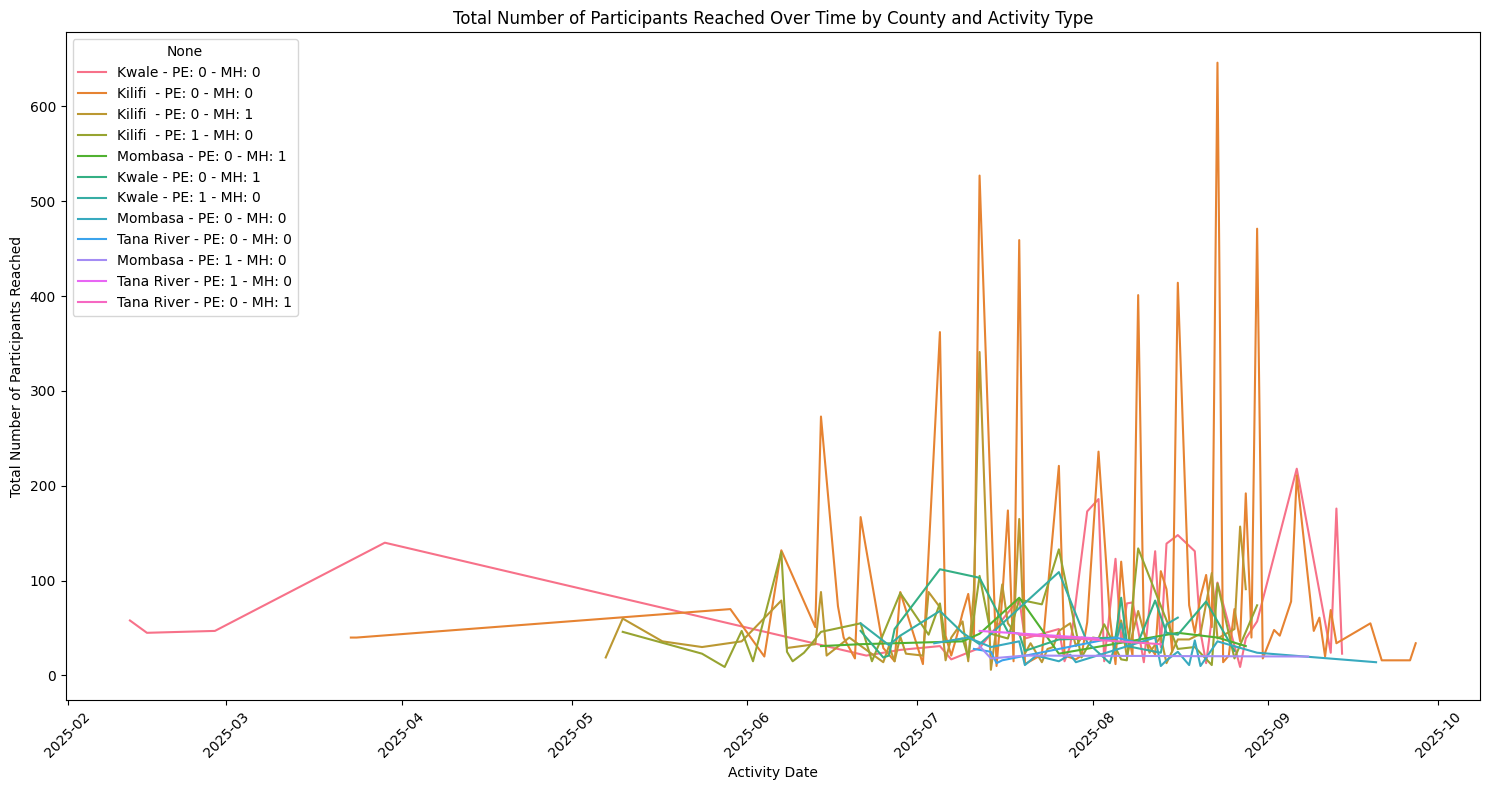

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.lineplot(data=data_aggregated,
             x='5. Activity Date',
             y='8. Total Number of Participants Reached',
             hue=data_aggregated['1. County'].astype(str) + ' - PE: ' + data_aggregated['6. Activity Name /Peer Education Session'].astype(str) + ' - MH: ' + data_aggregated['6. Activity Name /Mental Health Session '].astype(str))
plt.title('Total Number of Participants Reached Over Time by County and Activity Type')
plt.xlabel('Activity Date')
plt.ylabel('Total Number of Participants Reached')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

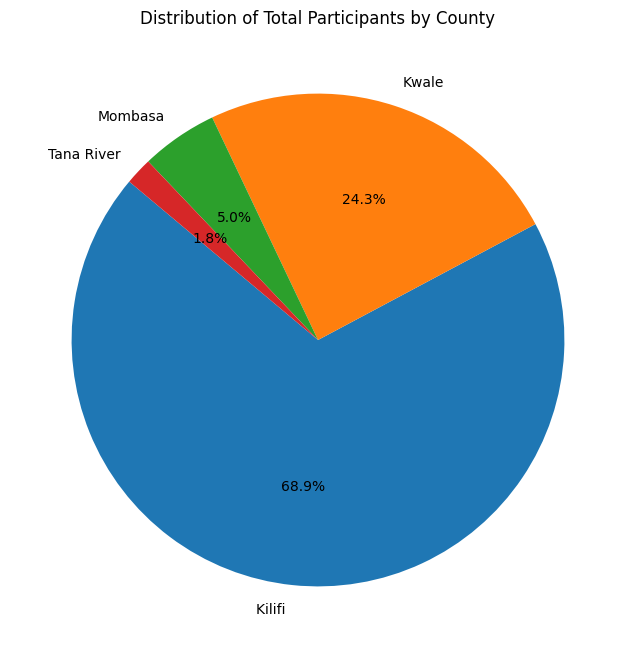

In [ ]:
import matplotlib.pyplot as plt

# Aggregate total participants by county
county_participants = data_aggregated.groupby('1. County')['8. Total Number of Participants Reached'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(county_participants,
        labels=county_participants.index,
        autopct='%1.1f%%',
        startangle=140)
plt.title('Distribution of Total Participants by County')
plt.show()


In [ ]:
print(data_aggregated['1. County'].unique())

['Kwale' 'Kilifi ' 'Mombasa' 'Tana River']


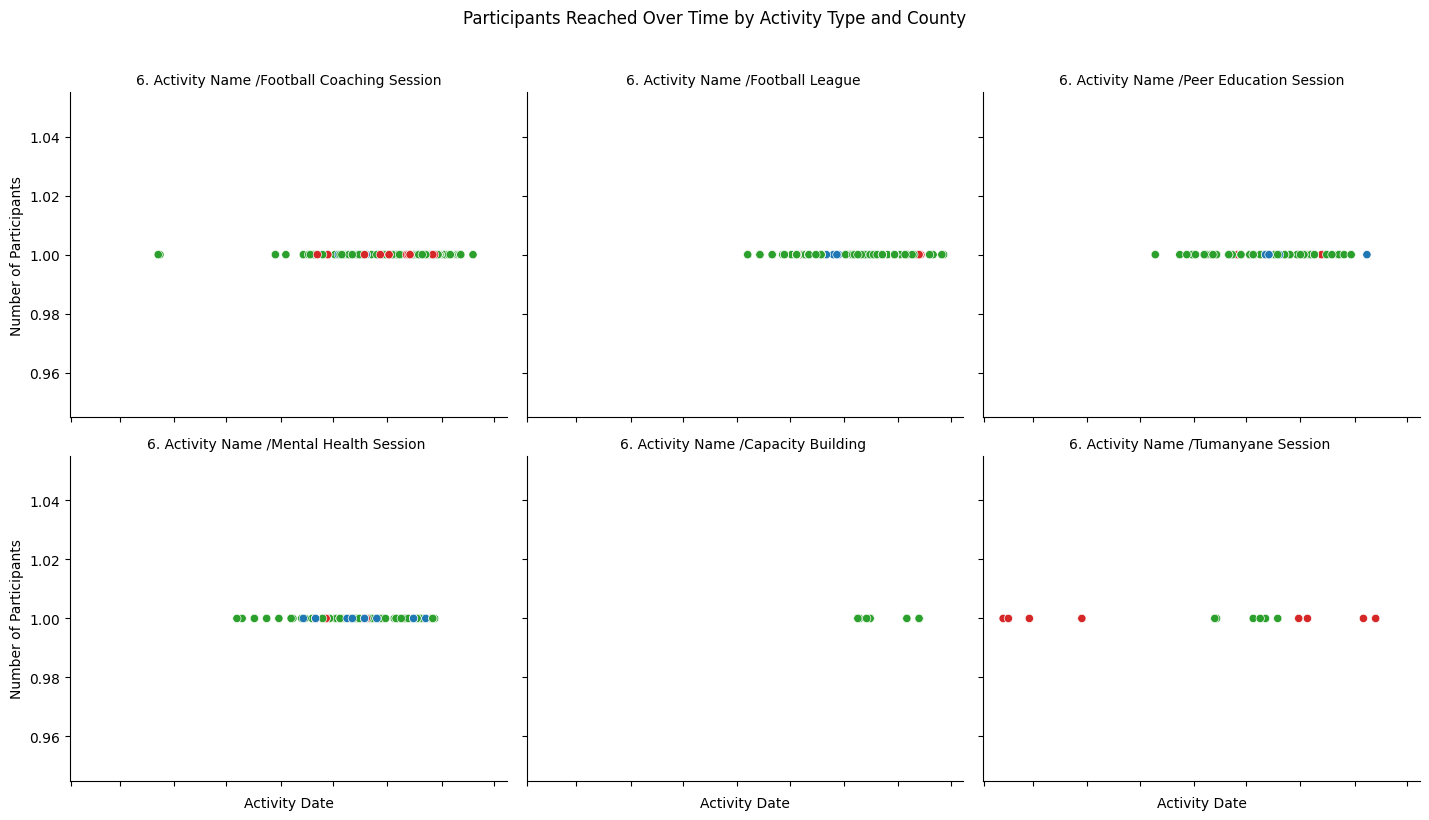

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported if not already

# Ensure '5. Activity Date' is available in data_melted. We need to merge it back or reshape differently.
# Let's go back to the original data_mental_health and melt it including the date column.
activity_columns = [col for col in data_mental_health.columns if col.startswith('6. Activity Name /')]
relevant_columns_melt_with_date = ['5. Activity Date', '1. County'] + activity_columns
data_melted_with_date = data_mental_health[relevant_columns_melt_with_date].melt(
    id_vars=['5. Activity Date', '1. County'],
    value_vars=activity_columns,
    var_name='Activity Type',
    value_name='Participants'
)

# Convert '5. Activity Date' to datetime after melting, handling errors
data_melted_with_date['5. Activity Date'] = pd.to_datetime(data_melted_with_date['5. Activity Date'], errors='coerce')

# Drop rows where '5. Activity Date' could not be parsed (became NaT)
data_melted_with_date.dropna(subset=['5. Activity Date'], inplace=True)

data_melted_with_date = data_melted_with_date[data_melted_with_date['Participants'] > 0].copy() # Filter for activities with participants

# Create faceted scatterplot
g = sns.FacetGrid(data_melted_with_date, col='Activity Type', col_wrap=3, height=4, aspect=1.2)
g.map(sns.scatterplot, '5. Activity Date', 'Participants', hue=data_melted_with_date['1. County'])

g.fig.suptitle('Participants Reached Over Time by Activity Type and County', y=1.02)
g.set_axis_labels('Activity Date', 'Number of Participants')
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha='right')
plt.tight_layout()
plt.show()

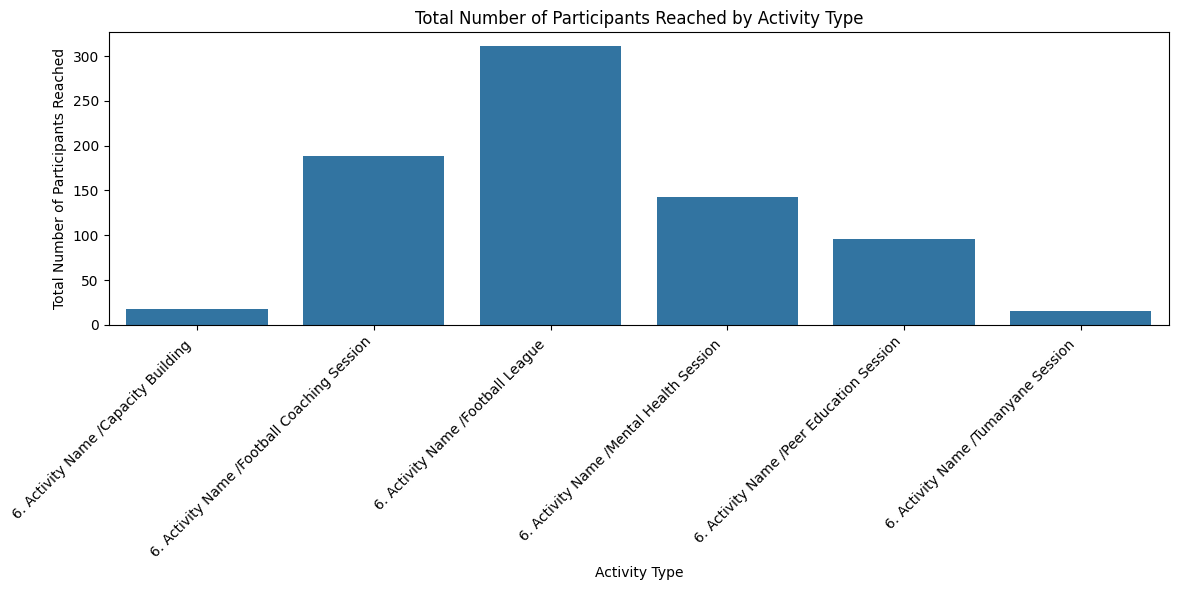

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total number of participants for each activity type
activity_participants = data_melted_with_date.groupby('Activity Type')['Participants'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=activity_participants, x='Activity Type', y='Participants')
plt.title('Total Number of Participants Reached by Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Total Number of Participants Reached')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

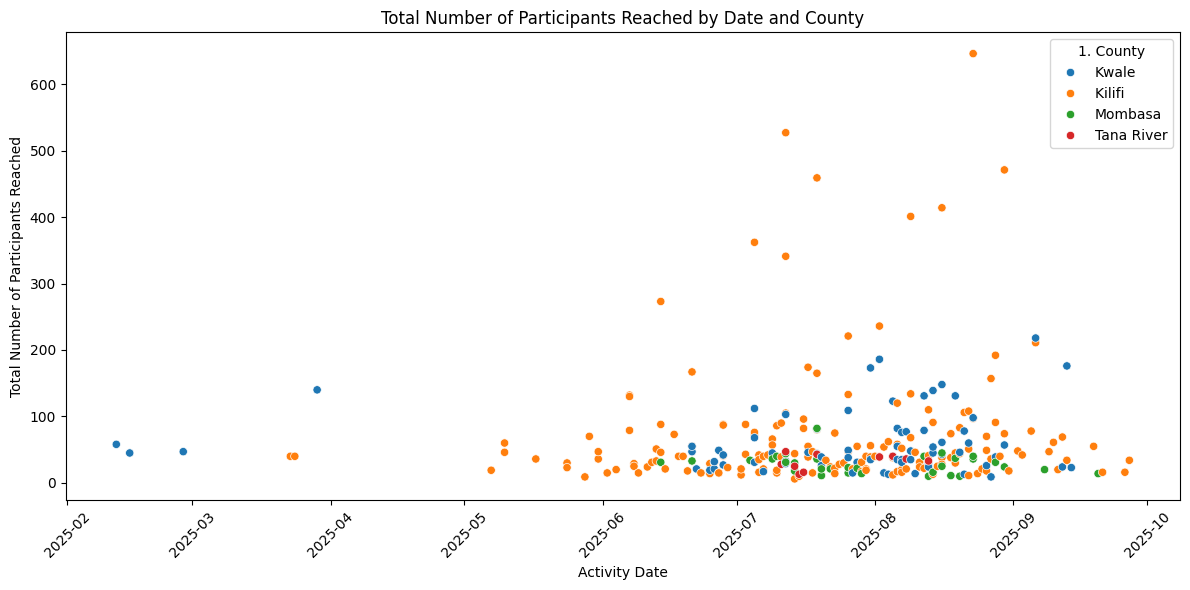

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_aggregated,
                x='5. Activity Date',
                y='8. Total Number of Participants Reached',
                hue='1. County')
plt.title('Total Number of Participants Reached by Date and County')
plt.xlabel('Activity Date')
plt.ylabel('Total Number of Participants Reached')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import shapiro

# Group data by Activity Type and perform Shapiro-Wilk test on Participants for each group
shapiro_results = {}
for activity_type, group_df in data_melted_with_date.groupby('Activity Type'):
    if len(group_df['Participants']) >= 3: # Shapiro test requires at least 3 data points
        shapiro_test_statistic, shapiro_p_value = shapiro(group_df['Participants'])
        shapiro_results[activity_type] = {'Test Statistic': shapiro_test_statistic, 'P-value': shapiro_p_value}
    else:
        shapiro_results[activity_type] = {'Test Statistic': 'N/A', 'P-value': 'N/A'}
        print(f"Skipping Shapiro test for '{activity_type}' due to insufficient data points.")

# Display the results
shapiro_results_df = pd.DataFrame.from_dict(shapiro_results, orient='index')
shapiro_results_df.index.name = 'Activity Type'
print("\nShapiro-Wilk Test Results for Participants by Activity Type:")
display(shapiro_results_df)

# Interpret the results for each activity type
alpha = 0.05
print("\nNormality Interpretation (alpha = 0.05):")
for activity_type, results in shapiro_results.items():
    if results['P-value'] != 'N/A':
        if results['P-value'] > alpha:
            print(f"'{activity_type}': Looks normally distributed (fail to reject H0)")
        else:
            print(f"'{activity_type}': Does not look normally distributed (reject H0)")
    else:
        print(f"'{activity_type}': Not enough data to perform test.")


Shapiro-Wilk Test Results for Participants by Activity Type:


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


,Test Statistic,P-value
Activity Type,,
6. Activity Name /Capacity Building,1.0,1.0
6. Activity Name /Football Coaching Session,1.0,1.0
6. Activity Name /Football League,1.0,1.0
6. Activity Name /Mental Health Session,1.0,1.0
6. Activity Name /Peer Education Session,1.0,1.0
6. Activity Name /Tumanyane Session,1.0,1.0



Normality Interpretation (alpha = 0.05):
'6. Activity Name /Capacity Building ': Looks normally distributed (fail to reject H0)
'6. Activity Name /Football Coaching Session': Looks normally distributed (fail to reject H0)
'6. Activity Name /Football League ': Looks normally distributed (fail to reject H0)
'6. Activity Name /Mental Health Session ': Looks normally distributed (fail to reject H0)
'6. Activity Name /Peer Education Session': Looks normally distributed (fail to reject H0)
'6. Activity Name /Tumanyane Session ': Looks normally distributed (fail to reject H0)


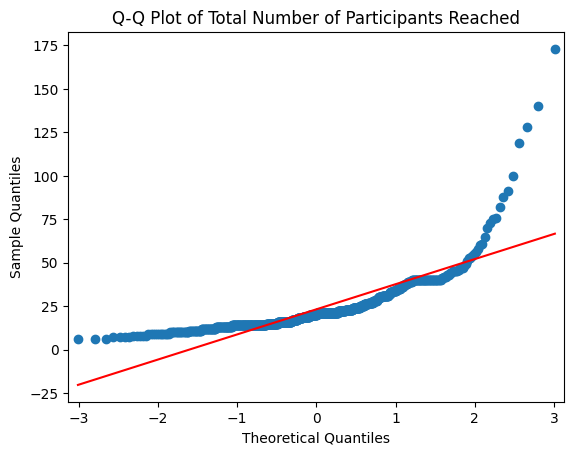

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create a Q-Q plot for the 'Total Number of Participants Reached' column
sm.qqplot(data_mental_health['8. Total Number of Participants Reached'], line='s')
plt.title('Q-Q Plot of Total Number of Participants Reached')
plt.show()

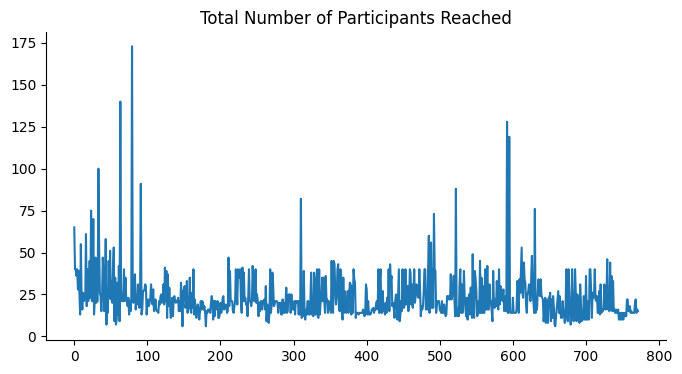

In [ ]:
#plotting a graph for the column '8. Total Number of Participants Reached'
# Convert the column to numeric type if it's not already
data_mental_health["8. Total Number of Participants Reached"] = pd.to_numeric(data_mental_health["8. Total Number of Participants Reached"], errors='coerce')

data_mental_health["8. Total Number of Participants Reached"].plot(kind="line", figsize=(8, 4), title="Total Number of Participants Reached")
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#shape of the data
data_mental_health.shape

(772, 18)

In [ ]:
#creating the output variable
y=data_mental_health["8. Total Number of Participants Reached"]

In [ ]:
#create the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
# Ensure X and y are aligned and handle potential missing values (although none were found initially)
# For robustness, we will drop rows where either X or y have missing values.
# Note: Based on previous checks, there are no missing values in the selected columns,
# but this step is good practice.

# Align X and y based on their indices before dropping NaNs
X_aligned, y_aligned = X.align(y, join='inner', axis=0)

# Drop rows with NaN values in either X_aligned or y_aligned
# We need to consider NaNs that might have been introduced by one-hot encoding if the original data had NaNs,
# or NaNs in y. However, since we dropped columns with NaNs initially and the selected columns are not expected to have NaNs,
# this step is primarily for robustness.
combined = pd.concat([X_aligned, y_aligned], axis=1)
combined_dropna = combined.dropna()

X_dropna = combined_dropna[X_aligned.columns]
y_dropna = combined_dropna[y_aligned.name]


# Now you can use X_dropna and y_dropna for train-test split and model training.
# For example:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_dropna, y_dropna, test_size=0.2, random_state=42)
# model.fit(X_train, y_train)
# predictions = model.predict(X_test)

print("Shape of X after handling potential NaNs:", X_dropna.shape)
print("Shape of y after handling potential NaNs:", y_dropna.shape)

Shape of X after handling potential NaNs: (772, 15)
Shape of y after handling potential NaNs: (772,)


In [ ]:
# Select activity name columns and the county column
activity_columns = [col for col in data_mental_health.columns if col.startswith('6. Activity Name /')]
feature_columns = ['1. County'] + activity_columns

# Create the feature matrix X by selecting and one-hot encoding the feature columns
X = pd.get_dummies(data_mental_health[feature_columns])

display(X.head())

,6. Activity Name /Football Coaching Session,6. Activity Name /Football League,6. Activity Name /Peer Education Session,6. Activity Name /Mental Health Session,6. Activity Name /Field Leaders Meeting,6. Activity Name /Capacity Building,6. Activity Name /Safe Guarding Session,6. Activity Name /Others,6. Activity Name /Tumanyane Session,6. Activity Name /Climate Action Session,6. Activity Name /Young Men as Equal Partners (YMEP),1. County_Kilifi,1. County_Kwale,1. County_Mombasa,1. County_Tana River
0,0,0,1,0,0,0,0,0,0,0,0,True,False,False,False
1,1,0,0,0,0,0,0,0,0,0,0,False,False,True,False
2,1,0,0,0,0,0,0,0,0,0,0,False,False,False,True
3,1,0,0,0,0,0,0,0,0,0,0,False,False,False,True
4,0,0,1,0,0,0,0,0,0,0,0,True,False,False,False


In [ ]:
# Select activity name columns and the county column
activity_columns = [col for col in data_mental_health.columns if col.startswith('6. Activity Name /')]
feature_columns = ['1. County'] + activity_columns

# Create the feature matrix X by selecting and one-hot encoding the feature columns
X = pd.get_dummies(data_mental_health[feature_columns])

display(X.head())

,6. Activity Name /Football Coaching Session,6. Activity Name /Football League,6. Activity Name /Peer Education Session,6. Activity Name /Mental Health Session,6. Activity Name /Field Leaders Meeting,6. Activity Name /Capacity Building,6. Activity Name /Safe Guarding Session,6. Activity Name /Others,6. Activity Name /Tumanyane Session,6. Activity Name /Climate Action Session,6. Activity Name /Young Men as Equal Partners (YMEP),1. County_Kilifi,1. County_Kwale,1. County_Mombasa,1. County_Tana River
0,0,0,1,0,0,0,0,0,0,0,0,True,False,False,False
1,1,0,0,0,0,0,0,0,0,0,0,False,False,True,False
2,1,0,0,0,0,0,0,0,0,0,0,False,False,False,True
3,1,0,0,0,0,0,0,0,0,0,0,False,False,False,True
4,0,0,1,0,0,0,0,0,0,0,0,True,False,False,False


In [ ]:
#ensure x and y have the same number of samples after dropping NANs
min_samples = min(X_dropna.shape[0], y_dropna.shape[0])
X_dropna = X_dropna.iloc[:min_samples, :]
y_dropna = y_dropna.iloc[:min_samples]

In [ ]:
#spliting the data set into train and test data
x_train,x_test,y_train,y_test=train_test_split(X_dropna,y_dropna,test_size=0.3)

In [ ]:
# Handle missing values in 'y' before fitting the model
y_train = y_train.dropna()  # Remove rows with NaN in y_train

In [ ]:
#training the model using the training data
model.fit(x_train,y_train)


LinearRegression()

In [ ]:
#training the model using the training data
model.fit(x_train,y_train)


LinearRegression()

In [ ]:
#predicting the values for the x testing values
y_predict=model.predict(x_test)

In [ ]:
#check shape of y_predict
print(y_predict.shape)

(232,)


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#evaluating the performance of the model
print(f"R-squared: {r2_score(y_test,y_predict)}")
r_square=r2_score(y_test,y_predict)

print(f"Mean absolute error: {mean_absolute_error(y_test,y_predict)}")

print(f"Mean squared error: {mean_squared_error(y_test, y_predict)}")

R-squared: 0.4755719076591163
Mean absolute error: 8.038968796006724
Mean squared error: 172.98152084526563


In [ ]:
#adjusted R-squared = 1 - [(1 - R-squared) * (n - 1) / (n - k - 1)]
#where n is the number of data points, n = 231
#k is the number of independent variables, k =5

adjusted_r2 = 1 - (1 - r_square) * (231 - 1) / (231 - 5 - 1)
print("Adjusted R_squared", adjusted_r2)

Adjusted R_squared 0.45752237570168297


In [ ]:
!pip install streamlit

In [ ]:
import warnings

In [ ]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
#mount google drive to be able to upload files to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#provide the correct path to the dataset file
import pandas as pd
data=pd.read_excel("/content/Program_Monitoring_Data.xlsx")

In [ ]:
#check first few rows
data.head()

,1. County,2. Department,3. Project Name,4. Activity Area / League Field,5. Activity Date,6. Activity Name /Football Coaching Session,6. Activity Name /Football League,6. Activity Name /Peer Education Session,6. Activity Name /Mental Health Session,6. Activity Name /Field Leaders Meeting,...,8a. Number of Participants aged 11 - 13 Years,8b. Number of Participants aged 11 - 13 Years Disabled,8a. Number of Participants aged 14 - 25 Years,8b. Number of Participants aged 14 - 25 Years Disabled,8a. Number of Participants aged above 26 Years,8b. Number of Participants aged above 26 Years Disabled,9. Data Source,Prepared by:,_id,_uuid
0,Kilifi,Health,NaN,Mwenzamoyo,2025-08-23,0,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Activity Report,Mary Kariuki,561438482,36a3400c-f632-4fcb-b6a4-59434d633b08
1,Mombasa,Community Encouragement And Football,Attacking and Defending,Ruben Mwewe,2025-08-12,1,0,0,0,0,...,11.0,0.0,22.0,0.0,0.0,0.0,Activity Report,monica,561461660,f791802c-3438-477f-9318-a3d583c6f219
2,Tana River,Community Encouragement And Football,Tafisa,Ruben Mwewe,2025-08-05,1,0,0,0,0,...,13.0,0.0,18.0,0.0,0.0,0.0,Activity Report,monica,561464521,933852c8-a4a1-4885-9827-2267d4d4abff
3,Tana River,Community Encouragement And Football,Tafisa,Ruben Mwewe,2025-08-08,1,0,0,0,0,...,12.0,0.0,21.0,0.0,0.0,0.0,Activity Report,monica,561466607,63641529-a2f2-4cc0-acd7-f1a3bfd9fb93
4,Kilifi,Health,NaN,mwezamoyo,2025-07-19,0,0,1,0,0,...,11.0,0.0,22.0,0.0,0.0,0.0,Activity Report,Mary Kariuki,561467145,5e02ff2d-ff2d-4d56-a728-eab3f6de6767


In [ ]:

#check missing values
missing_data=data.isnull().sum()

In [ ]:
print(missing_data)

1. County                                                    0
2. Department                                                1
3. Project Name                                            252
4. Activity Area / League Field                              0
5. Activity Date                                             0
6. Activity Name /Football Coaching Session                  0
6. Activity Name /Football League                            0
6. Activity Name /Peer Education Session                     0
6. Activity Name /Mental Health Session                      0
6. Activity Name /Field Leaders Meeting                      0
6. Activity Name /Capacity Building                          0
6. Activity Name /Safe Guarding Session                      0
6. Activity Name /Others                                     0
6. Activity Name /Tumanyane Session                          0
6. Activity Name /Climate Action Session                     0
6. Activity Name /Young Men as Equal Partners (YMEP)   

In [ ]:
# Drop columns with any null values
data_cleaned = data.dropna(axis=1)

# Display the first few rows of the cleaned data and the number of remaining columns
print("Shape of data after dropping columns with nulls:", data_cleaned.shape)
display(data_cleaned.head())

Shape of data after dropping columns with nulls: (772, 21)


,1. County,4. Activity Area / League Field,5. Activity Date,6. Activity Name /Football Coaching Session,6. Activity Name /Football League,6. Activity Name /Peer Education Session,6. Activity Name /Mental Health Session,6. Activity Name /Field Leaders Meeting,6. Activity Name /Capacity Building,6. Activity Name /Safe Guarding Session,...,6. Activity Name /Tumanyane Session,6. Activity Name /Climate Action Session,6. Activity Name /Young Men as Equal Partners (YMEP),8. Total Number of Participants Reached,8a. Number of Participants aged 7 - 10 Years,8b. Number of Participants aged 7 - 10 Years Disabled,9. Data Source,Prepared by:,_id,_uuid
0,Kilifi,Mwenzamoyo,2025-08-23,0,0,1,0,0,0,0,...,0,0,0,65,18,0,Activity Report,Mary Kariuki,561438482,36a3400c-f632-4fcb-b6a4-59434d633b08
1,Mombasa,Ruben Mwewe,2025-08-12,1,0,0,0,0,0,0,...,0,0,0,40,5,0,Activity Report,monica,561461660,f791802c-3438-477f-9318-a3d583c6f219
2,Tana River,Ruben Mwewe,2025-08-05,1,0,0,0,0,0,0,...,0,0,0,40,8,0,Activity Report,monica,561464521,933852c8-a4a1-4885-9827-2267d4d4abff
3,Tana River,Ruben Mwewe,2025-08-08,1,0,0,0,0,0,0,...,0,0,0,36,3,0,Activity Report,monica,561466607,63641529-a2f2-4cc0-acd7-f1a3bfd9fb93
4,Kilifi,mwezamoyo,2025-07-19,0,0,1,0,0,0,0,...,0,0,0,40,7,0,Activity Report,Mary Kariuki,561467145,5e02ff2d-ff2d-4d56-a728-eab3f6de6767


In [ ]:
# Check for missing values in the cleaned data
missing_data_cleaned = data_cleaned.isnull().sum()

# Display the missing values count for each column in the cleaned data
print("Missing values in data_cleaned DataFrame:")
print(missing_data_cleaned)

Missing values in data_cleaned DataFrame:
1. County                                                0
4. Activity Area / League Field                          0
5. Activity Date                                         0
6. Activity Name /Football Coaching Session              0
6. Activity Name /Football League                        0
6. Activity Name /Peer Education Session                 0
6. Activity Name /Mental Health Session                  0
6. Activity Name /Field Leaders Meeting                  0
6. Activity Name /Capacity Building                      0
6. Activity Name /Safe Guarding Session                  0
6. Activity Name /Others                                 0
6. Activity Name /Tumanyane Session                      0
6. Activity Name /Climate Action Session                 0
6. Activity Name /Young Men as Equal Partners (YMEP)     0
8. Total Number of Participants Reached                  0
8a. Number of Participants aged 7 - 10 Years             0
8b. Number of 

In [ ]:
# Drop rows with any null values from the original data DataFrame
data_rows_dropped = data.dropna(axis=0)

# Display the shape of the DataFrame after dropping rows with nulls
print("Shape of data after dropping rows with nulls:", data_rows_dropped.shape)

Shape of data after dropping rows with nulls: (0, 33)


In [ ]:
#ensure x and y have the same number of samples after dropping NANs
min_samples = min(X_dropna.shape[0], y_dropna.shape[0])
X_dropna = X_dropna.iloc[:min_samples, :]
y_dropna = y_dropna.iloc[:min_samples]

In [ ]:
#spliting the data set into train and test data
x_train,x_test,y_train,y_test=train_test_split(X_dropna,y_dropna,test_size=0.3)

In [ ]:
#create model
model=LinearRegression()

In [ ]:
#training the model using the training data
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#use model to make predictions
y_pred=model.predict(x_test)

In [ ]:
model.predict([[1,0,1,1,1,1,0,0,0,1,1,0,1,0,2]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.92089117])

In [ ]:
import joblib
joblib_file = "linear_regression_model.joblib"
joblib.dump(model, joblib_file)

['linear_regression_model.joblib']

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np
import pandas as pd
import os

# Cache the model loading
@st.cache_resource
def load_model(model_path):
    return joblib.load(model_path)

# Path to model
model_file_path = "linear_regression_model.joblib"

# Load model
if not os.path.exists(model_file_path):
    st.error(f"❌ Model file not found at {model_file_path}. "
             "Please make sure 'linear_regression_model.joblib' is in the same directory as app.py.")
else:
    model = load_model(model_file_path)

    # Title
    st.title("📊 Participant Prediction App")
    st.write("Fill in the details in the sidebar, then click **Predict** to estimate participants.")

    # Sidebar inputs
    st.sidebar.header("🔧 Input Parameters")

    feature_columns = [
        '6. Activity Name /Capacity Building ',
        '6. Activity Name /Climate Action Session ',
        '6. Activity Name /Field Leaders Meeting ',
        '6. Activity Name /Football Coaching Session',
        '6. Activity Name /Football League ',
        '6. Activity Name /Mental Health Session ',
        '6. Activity Name /Peer Education Session',
        '6. Activity Name /Safe Guarding Session ',
        '6. Activity Name /Others ',
        '6. Activity Name /Tumanyane Session ',
        '6. Activity Name /Young Men as Equal Partners (YMEP) ',
        '1. County_Kilifi ',
        '1. County_Kwale',
        '1. County_Mombasa',
        '1. County_Tana River'
    ]

    # ---- County selection ----
    counties = ['Kilifi ', 'Kwale', 'Mombasa', 'Tana River']
    selected_county = st.sidebar.selectbox("🌍 Select County", counties)

    # ---- Activity area ----
    activity_area = st.sidebar.text_input("📍 Activity Area", placeholder="e.g., League Field, School, Hall")

    # ---- Activity date ----
    activity_date = st.sidebar.date_input("📅 Activity Date")

    # ---- Activity selection ----
    st.sidebar.subheader("🎯 Select Activity Types")
    activity_selections = {}
    for col in feature_columns:
        if col.startswith("6. Activity Name /"):
            activity_name = col.replace("6. Activity Name /", "").strip()
            activity_selections[col] = st.sidebar.checkbox(activity_name, value=False)

    # ---- Predict button ----
    if st.sidebar.button("🚀 Predict"):
        # Input features
        input_features = np.zeros(len(feature_columns))
        input_df = pd.DataFrame([input_features], columns=feature_columns)

        # Set county
        county_col_name = f"1. County_{selected_county}"
        if county_col_name in input_df.columns:
            input_df[county_col_name] = 1

        # Set selected activities
        for col, is_selected in activity_selections.items():
            if is_selected:
                input_df[col] = 1

        try:
            prediction = model.predict(input_df)
            st.success(f"🎯 Predicted Total Participants: **{prediction[0]:.2f}**")

            # Display extra inputs
            st.info(f"🗓️ Date: {activity_date} | 📍 Area: {activity_area} | 🌍 County: {selected_county}")

        except Exception as e:
            st.error(f"⚠️ Error during prediction: {e}")


Overwriting app.py


In [ ]:
# Install localtunnel globally
!npm install -g localtunnel


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧
changed 22 packages in 2s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧

In [ ]:
#get password
!curl ipv4.icanhazip.com

34.173.104.135


In [ ]:

#use browser to launch app
!streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.173.104.135:8501

⠴⠦⠧⠇⠏⠋your url is: https://light-needles-serve.loca.lt
